In [2]:
def expectedPayoff(p,n):
    return 1-(1-p)**n+(-2**(n)+1)*(1-p)**n

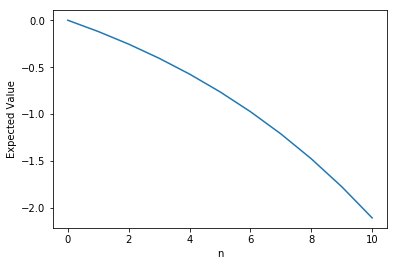

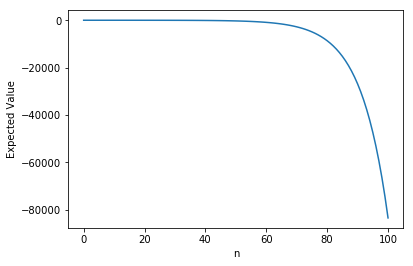

In [4]:
import matplotlib.pyplot as plt
payoffs = [expectedPayoff(.44,x) for x in range(0,11)]
periods = list(range(0,11))
plt.plot(periods,payoffs)
plt.xlabel("n")
plt.ylabel("Expected Value")
plt.show()
payoffs = [expectedPayoff(.44,x) for x in range(0,101)]
periods = list(range(0,101))
plt.plot(periods,payoffs)
plt.xlabel("n")
plt.ylabel("Expected Value")
plt.show()

In [5]:
import random
import matplotlib.pyplot as plt
class gambler:
    def __init__(self,p,money,rounds):
        self.p = p
        self.money = money
        self.start = money
        self.bet = 1
        self.rounds = rounds
        self.historyMoney = [money]
        self.historyBet = []
    def gamble(self,bet):
        if random.uniform(0,1)<=self.p:
            self.money+=self.bet
            self.historyMoney.append(self.money)
            self.historyBet.append(bet)
            self.bet = 1
        else:
            self.money-=self.bet
            self.historyMoney.append(self.money)
            self.historyBet.append(bet)
            self.bet=self.bet*2
        if self.money>bet:
            return self.bet
        else: 
            return -1
    
    def begin(self):
        for _ in range(self.rounds):
            if self.bet != -1:
                self.bet = self.gamble(self.bet)
            else:
                break
        while self.bet>1:
            self.bet = self.gamble(self.bet)
    def betsGraph(self):
        x = list(range(len(self.historyBet)))
        y = list(self.historyBet)
        plt.plot(x,y)
        plt.title("Bet")
        plt.xlabel("n")
        plt.ylabel("Bet Amount")
        plt.show()
    def moneyGraph(self):
        x = list(range(len(self.historyMoney)))
        y = list(self.historyMoney)
        plt.plot(x,y)
        plt.title("Money")
        plt.xlabel("n")
        plt.ylabel("Money")
        plt.show()

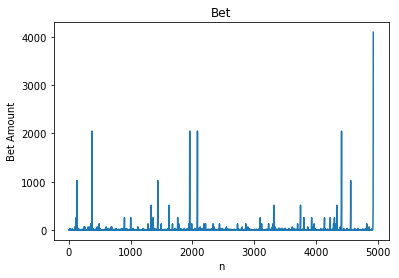

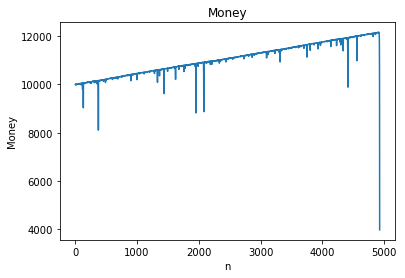

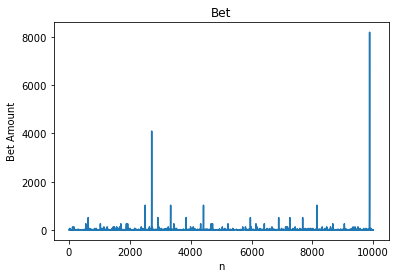

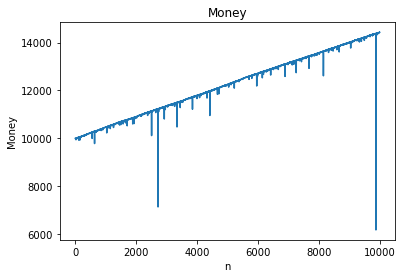

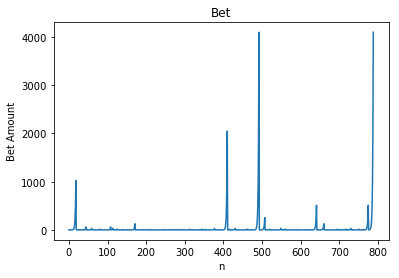

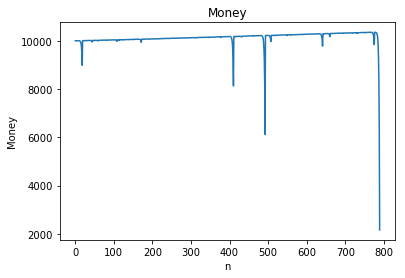

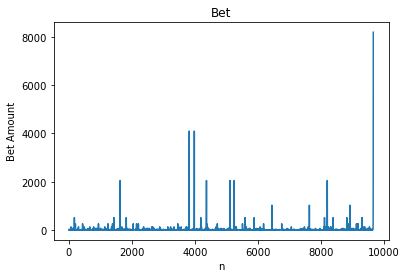

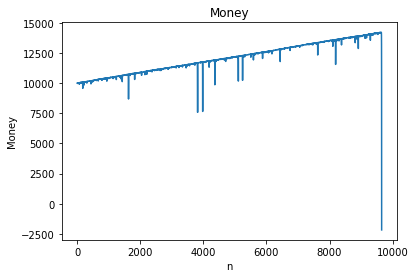

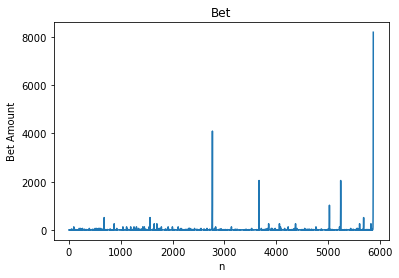

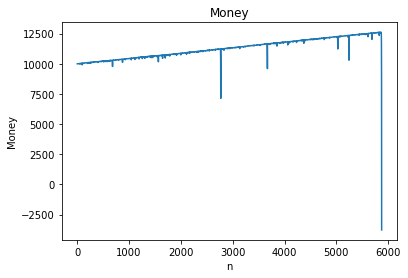

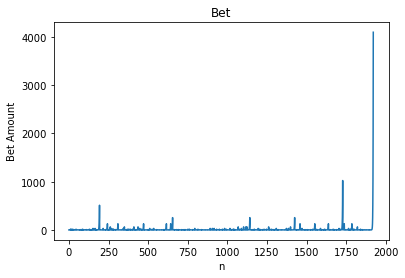

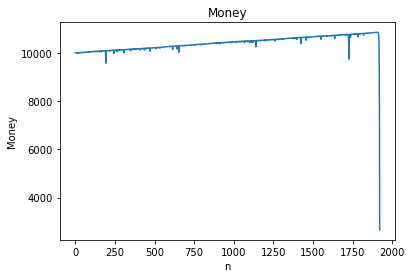

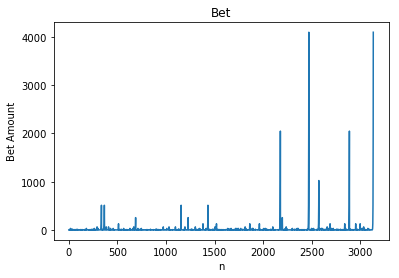

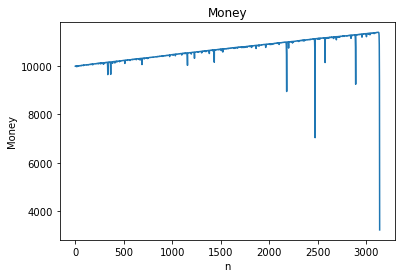

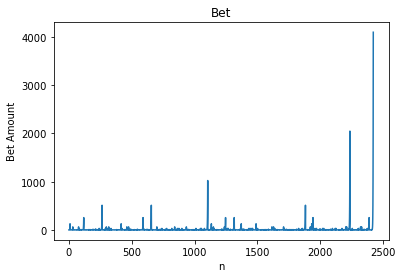

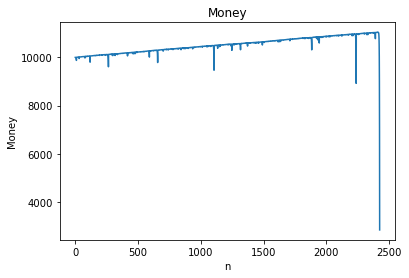

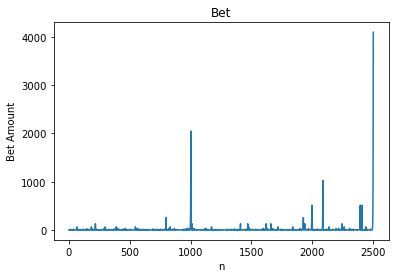

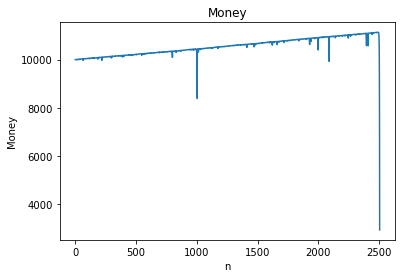

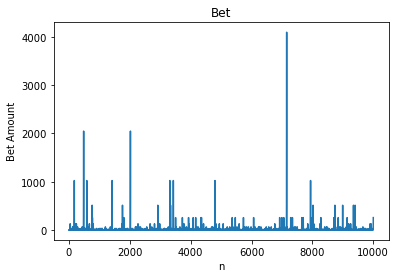

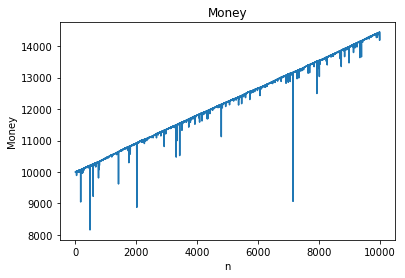

In [6]:
for x in range(10):
    person1 = gambler(.44,10000,10000)
    person1.begin()
    person1.betsGraph()
    person1.moneyGraph()


In [25]:
gamblers = [gambler(.44,10000,1000) for x in range(10000)]


In [26]:
for x in gamblers:
    x.begin()

In [27]:
import numpy as np
print(np.mean([x.money for x in gamblers]))

8699.4404


In [34]:
import pandas as pd
df = pd.DataFrame([x.historyMoney for x in gamblers])
print(df.mean())

0       10000.000000
1        9999.880200
2        9999.668500
3        9999.424600
4        9999.083400
5        9998.643100
6        9998.082100
7        9997.360700
8        9996.382200
9        9995.828000
10       9995.201500
11       9993.741700
12       9991.318200
13       9987.101500
14       9992.655159
15       9993.158358
16       9989.311612
17       9989.250976
18       9993.566389
19       9994.478248
20       9996.132357
21       9995.739597
22       9997.347442
23       9999.795003
24       9997.564018
25       9998.586830
26       9999.183735
27       9999.856397
28       9999.947670
29       9999.244299
            ...     
983     10418.522414
984     10420.559439
985     10422.963409
986     10422.095250
987     10421.765731
988     10422.946082
989     10422.176574
990     10421.684059
991     10424.709949
992     10421.840025
993     10426.690936
994     10424.378986
995     10426.841643
996     10428.759231
997     10428.608341
998     10428.415578
999     10428

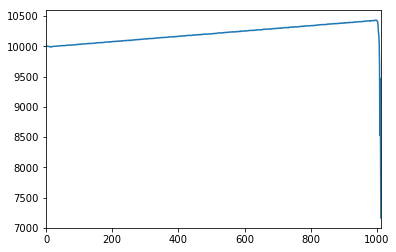

In [30]:
import matplotlib.pyplot as plt
df.mean().plot()
plt.show()

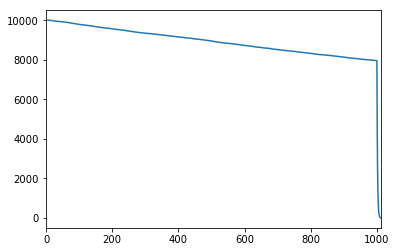

In [31]:
import matplotlib.pyplot as plt
df.count().plot()
plt.show()

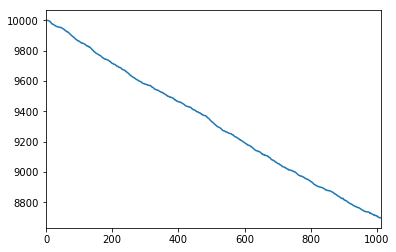

In [33]:
for x in range(1,1013):
    df[x] = df[x].fillna(df[x-1])
df.mean().plot()
plt.show()